In [181]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tqdm import tqdm

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [167]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [168]:
df['status'].unique()

array([1, 0], dtype=int64)

In [169]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [170]:
selected_cols = df.drop(['status','name'],axis=1).columns

In [171]:
df[selected_cols] = df[selected_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [172]:
selected_cols

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [173]:
# will compare tensorflow's linear classifier results with baseline model: logistic regression classifier of dataframe with all columns 
df_all = df
df_all = df_all.drop(['name'],axis=1)

In [112]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.383623,0.193841,0.292748,0.144233,0.146083,0.126513,0.135389,0.126504,0.184126,0.162080,...,0.214101,0.077019,0.546410,0.753846,0.564574,0.572963,0.412332,0.495783,0.426421,0.335549
std,0.240959,0.186761,0.250564,0.154007,0.137636,0.142956,0.147855,0.142934,0.172147,0.160129,...,0.195527,0.128652,0.179865,0.431878,0.242525,0.220456,0.197110,0.187758,0.170294,0.186649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170220,0.066786,0.108323,0.056544,0.051383,0.047206,0.050375,0.047279,0.063584,0.052177,...,0.071222,0.016790,0.437170,1.000000,0.384375,0.400291,0.273893,0.378364,0.300658,0.192433
50%,0.351961,0.150411,0.223606,0.103558,0.090909,0.087669,0.094855,0.087494,0.122604,0.111750,...,0.158685,0.035045,0.554499,1.000000,0.558550,0.589516,0.405738,0.478618,0.417393,0.309661
75%,0.549775,0.249162,0.429160,0.180591,0.209486,0.151975,0.162647,0.151951,0.258764,0.217749,...,0.302703,0.079543,0.676034,1.000000,0.772299,0.747391,0.527720,0.614472,0.539698,0.431709
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
corr = df[selected_cols].corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [114]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = df[selected_cols].columns[columns]


In [115]:
# selected_columns = selected_columns.values

selected_columns = np.append(selected_columns,['status'])

In [116]:
df = df[selected_columns]

In [117]:
selected_columns = selected_columns[:-1]

In [118]:
selected_columns

array(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'HNR', 'RPDE', 'DFA', 'spread2', 'D2'], dtype=object)

In [119]:
len(df.iloc[:,:-1].values[0])

9

In [48]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns2 = backwardElimination(df.iloc[:,:-1].values, df.iloc[:,-1].values, SL, selected_columns)

In [16]:
result = pd.DataFrame()
result['status'] = df.iloc[:,-1]
df2 = pd.DataFrame(data = data_modeled, columns = selected_columns2)
df2 = pd.concat([df2,result],axis=1)


In [17]:
df2.columns

Index(['MDVP:Flo(Hz)', 'DFA', 'spread2', 'D2', 'status'], dtype='object')

In [18]:
MDVP_Flo_Hz = tf.feature_column.numeric_column('MDVP:Flo(Hz)')
MDVP_Jitter_pct = tf.feature_column.numeric_column('MDVP:Jitter(%)')
DFA = tf.feature_column.numeric_column('DFA')
spread2 = tf.feature_column.numeric_column('spread2')
D2 = tf.feature_column.numeric_column('D2')

feat_columns = [MDVP_Flo_Hz, MDVP_Jitter_pct, DFA, spread2, D2]

In [158]:
X = df.drop('status',axis=1)
y = df['status']

In [160]:
def shuffle_split_data(X, y, test_size = 0.25, random_state=43):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, 100*(1- test_size))

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = shuffle_split_data(X,y)

In [77]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_train,
                                           y=y_train,
                                           batch_size=10,
                                           num_epochs=1000,
                                           shuffle=True)

In [78]:
model=tf.estimator.LinearClassifier(feature_columns=feat_columns,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmp09api2sh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [79]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Admin\AppData\Local\Temp\tmp09api2sh\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:lo

In [80]:
pred_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
x=X_test,
batch_size=10,
num_epochs=1,
shuffle=False)


In [81]:
predictions=list(model.predict(input_fn=pred_func))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmp09api2sh\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [82]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [83]:
final_preds = pd.DataFrame(final_preds,columns=['Predicted'])
final_preds = final_preds['Predicted']

In [84]:
y_test.reset_index(drop=True,inplace=True)
# y_test.columns

In [85]:
df_confusion = pd.crosstab(y_test, final_preds,margins=True)

In [86]:
df_confusion

Predicted,0,1,All
status,,,
0,5,12,17
1,0,32,32
All,5,44,49


In [87]:
tp = df_confusion[0][0]
fp = df_confusion[0][1]
fn = df_confusion[1][0]
tn = df_confusion[1][1]

accuracy = (tp+tn)/(tp+fp+fn+tn)
precision = (tn)/(tn+fn)
recall = (tn)/(tn+fp)
print(accuracy, precision, recall)

0.7551020408163265 0.7272727272727273 1.0


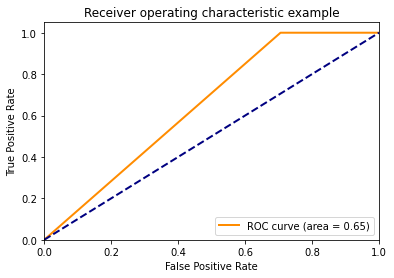

In [88]:
fpr, tpr, _ = roc_curve(y_test.ravel(),final_preds.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [212]:
class LogisticRegressionClassifier:
    def __init__(self, learningRate, tolerance,
                maxIteration = 50000):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        
    def dataset_reader(self):
        train_df = pd.read_excel('Lab4_data.xls',sheet_name = '2004--2005 Data')
        test_df = pd.read_excel('Lab4_data.xls',sheet_name = '2004--2007 Data')
        
        train_df = np.array(train_df, dtype=np.float64)
        test_df = np.array(test_df,dtype=np.float64)
        
        X_train, y_train = train_df[:,1:], train_df[:,0]
        X_test, y_test = test_df[:,1:],test_df[:,0]
        
    def add_X0(self, X):
        return np.column_stack([np.ones(X.shape[0], 1), X])
    
    def sigmoid(self, z):
        
        sig = 1/(1+np.exp(-z))
        return sig
    
    def cost_function(self,X,y):
        sig = self.sigmoid(X.dot(self.w))
#         pred = y*np.log(sig)+(1-y)*np.log(1-sig)
#         cost = pred.sum()
        
        #or:
        pred_ = np.log(np.ones(X.shape[0])+np.exp(sig)) - X.dot(self.w).dot(y)
        cost = pred_.sum()
        
        return cost
    
    def gradient(self,X,y):
        sig = self.sigmoid(X.dot(self.w))
        
        grad = (sig - y).dot(X)
        
        return grad
    
    def gradient_descent(self,X,y):
        cost_sequence = []
        last_cost = np.float('inf')
        tolerance_counter = 0
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X,y)
            current_cost = self.cost_function(X,y)
            diff = last_cost - current_cost
            last_cost = current_cost
            cost_sequence.append(current_cost)
            
            if diff < self.tolerance:
                tolerance_counter += 1
#                 print('The model stopped - no further improvement')
#                 if tolerance_counter == 10:
                break
                
        self.plot_cost(cost_sequence)
        return
    
    def evaluate(self,y,y_hat):
        y = (y==1)
        y_hat = (y_hat ==1)
        
        accuracy = (y == y_hat).sum()/len(y)
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return accuracy, recall, precision
    
    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig,ax = plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel='iterationos',ylabel='cost',
              title='cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1),loc=2,shadow=True)
        plt.show()
    
    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    
    def run_model(self, index_drop='NA'):
        self.X_train, self.y_train, self.X_test, self.y_test = shuffle_split_data(X,y)
        self.w = np.ones(self.X_train.shape[1], dtype=np.float64)*0
        self.gradient_descent(self.X_train,self.y_train)
        
        print(self.w)
        
        y_hat = self.predict(self.X_test)
        accuracy, recall, precision = self.evaluate(self.y_test, y_hat)
        
        print('Accuracy:', accuracy)
        print('Recall:', recall)
        print('Precision:', precision)
    

100%|██████████| 10000/10000 [00:31<00:00, 319.20it/s]
No handles with labels found to put in legend.


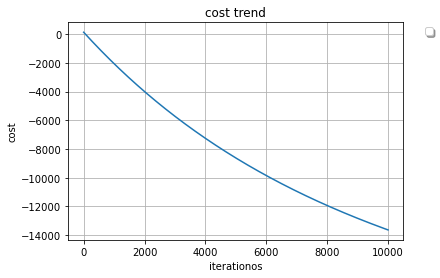

bias                0.203027
MDVP:Fo(Hz)         0.020980
MDVP:Fhi(Hz)        0.015399
MDVP:Flo(Hz)        0.015276
MDVP:Jitter(%)      0.057040
MDVP:Jitter(Abs)    0.061018
MDVP:RAP            0.050193
MDVP:PPQ            0.054969
Jitter:DDP          0.050183
MDVP:Shimmer        0.073078
MDVP:Shimmer(dB)    0.065140
Shimmer:APQ3        0.081040
Shimmer:APQ5        0.065278
MDVP:APQ            0.053499
Shimmer:DDA         0.081043
NHR                 0.029746
HNR                 0.068304
RPDE                0.171503
DFA                 0.143719
spread1             0.154988
spread2             0.151529
D2                  0.120358
PPE                 0.132761
dtype: float64
Accuracy: 0.7551020408163265
Recall: 1.0
Precision: 0.7551020408163265


In [213]:
X = df_all.drop('status',axis=1)
y = df_all['status']



lr = LogisticRegressionClassifier(tolerance=0.0,learningRate = 0.1e-5, maxIteration=10000)
lr.run_model()